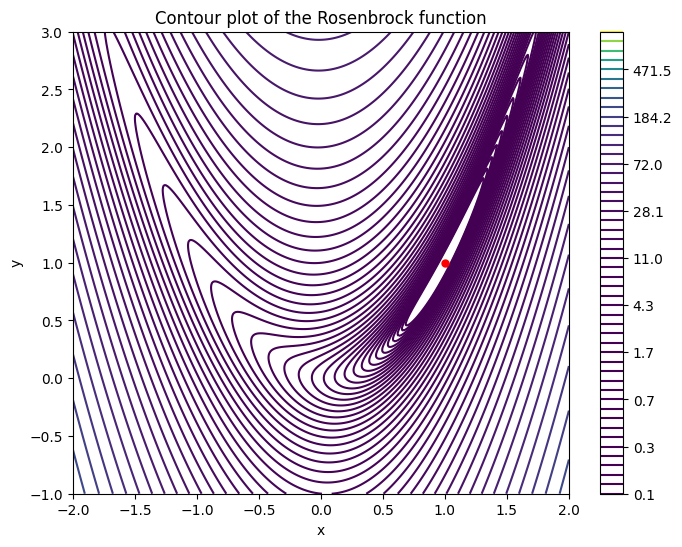

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x):
    return 10*(x[1] - x[0]**2)**2 + (1 - x[0])**2

# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

Z=np.zeros((Y.shape[0],X.shape[0]))#数据大小为Y*X 数据读取方式是Z[y,x]
for i in range(Z.shape[0]):#y
  for j in range(Z.shape[1]):#x
    x_new=[x[j],y[i]]
    Z[i,j]= rosenbrock(x_new)

# Plotting the contour map
plt.figure(figsize=(8, 6))
contour = plt.contour(x,y, Z, levels=np.logspace(-1, 3, 50), cmap='viridis')
plt.plot(1, 1, 'r.', markersize=10)  # Marking the minimum point
plt.title('Contour plot of the Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)  # Show a color bar to indicate the levels
plt.show()


In [21]:
def rosen_grad(x):
    """
    Compute the gradient of the Rosenbrock function at point x.
    :param x: A numpy array with 2 elements, where x[0] is x and x[1] is y.
    :return: A numpy array containing the partial derivatives with respect to x and y.
    """
    grad = np.zeros(2)
    grad[0] = -40 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 20 * (x[1] - x[0]**2)
    return grad


In [24]:
def steepest_descent_bt(fun, grad, x0, alpha=0.001, beta=0.9, epsilon=1e-5):
    """
    Perform the steepest descent with backtracking line search.

    :param fun: A function that computes the value of the objective function.
    :param grad: A function that computes the gradient of the objective function.
    :param x0: The starting point for the descent algorithm.
    :param alpha: The alpha parameter for the backtracking line search.
    :param beta: The beta parameter for the backtracking line search.
    :param epsilon: The convergence criterion for the gradient norm.
    :return: The point where the algorithm converged and the number of iterations.
    """
    x = x0
    iter_count = 0
    history=np.array([x])
    while np.linalg.norm(grad(x)) > epsilon:
        iter_count += 1
        direction = -grad(x)
        t = 1

        # Backtracking line search
        while fun(x + t*direction) > fun(x) + alpha*t*np.dot(grad(x), direction):
            t *= beta

        # Update the current point
        x += t*direction
        history=np.vstack((history,x))
    return x, iter_count,history


In [23]:
print(steepest_descent_bt(rosenbrock,rosen_grad,np.array([-1.2,1])))

(array([1.00000223, 1.00000433]), 1753)


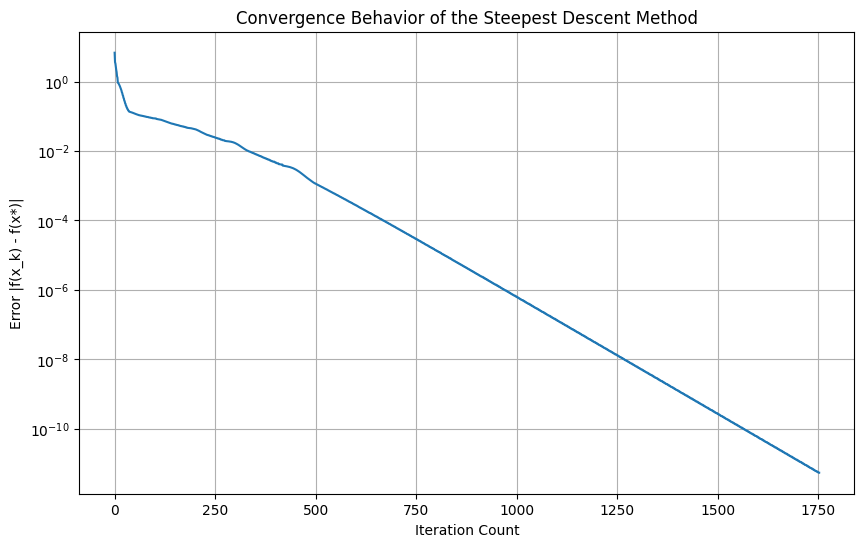

In [26]:
x0=np.array([-1.2,1.0])
xstar,itern,history=steepest_descent_bt(rosenbrock,rosen_grad,x0)
fhist=np.zeros(itern)
for i in range(itern):
  fhist[i]=rosenbrock(history[i,:])#hist[i,:]取某一行所有数据
# Create the semilog plot of the error |f(x_k) - f(x*)| vs iteration count
plt.figure(figsize=(10, 6))
plt.semilogy(np.arange(0,itern), np.absolute(fhist))
plt.xlabel('Iteration Count')
plt.ylabel('Error |f(x_k) - f(x*)|')
plt.title('Convergence Behavior of the Steepest Descent Method')
plt.grid(True)
plt.show()